In [72]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и знакомство с данными

In [73]:
df = pd.read_csv('/home/mainuser/IIS_Li_Egor/data/car data.csv')

Загрузили данные в переменную df

In [74]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


Вывели первые 10 строк датафрэйма

In [37]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Посмотрели типы данных стольцов, а также количетсво Non-Null ячеек в этих столбцах

In [75]:
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner'] = df['Owner'].astype('category')
df['Car_Name'] = df['Car_Name'].astype('category')

Поменяли тип данных на категориальный

In [76]:
df['Year'] = df['Year'].astype('int32')
df['Driven_kms'] = df['Driven_kms'].astype('int32')


Поменяли тип данныз на int32, чтобы наш датафрэйм занимал меньше места в памяти

In [77]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int32   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Driven_kms     301 non-null    int32   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    category
dtypes: category(5), float64(2), int32(2)
memory usage: 12.0 KB


Снова вывели информацию по столцам, чтобы проверить поменялись ли типы данных

In [78]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.642584,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


Посмотрели основные статистики по числовым столбцам

In [79]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
print(cat_features)

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


Созади список с категориальными признаками

In [80]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']

Создали список с числовыми столбцами

In [81]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Car_Name - numer of unique = 98
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 2
Transmission - numer of unique = 2
Owner - numer of unique = 3


Посмотрели сколько уникальных значений в каждом категориальном столбце

In [82]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Unique categories in Owner: Owner
0    290
1     10
3      1
Name: count, dtype: int64


Посмотрели уникальные значения для каждого числового стобца

In [83]:
df_cel_per = df['Selling_Price']

Выделили столбец с целевой переменной

# Очистка данных

Было принято решение не удалять какие-либо столбцы или строки, по скольку все данные валидные.\
Данный вывод был сделан с помощью функции describe() и head()

# Анализ признаков для модели


In [84]:
df['Driven_run'] = df['Driven_kms'].apply(lambda x: 'low' if x <= 15000 \
                             else 'hi' if x > 48767 \
                             else 'mid')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_run
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,mid
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,mid
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,low
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,low
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,mid
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,mid
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,hi
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,hi
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,low


Создали новый признак - уровень пробега автомобиля

<Axes: xlabel='Year', ylabel='Selling_Price'>

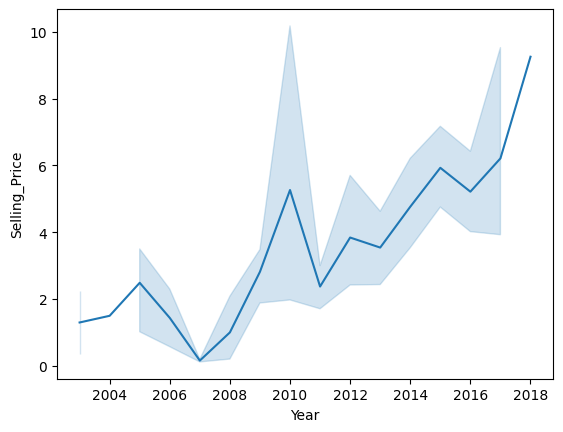

In [85]:
sns.lineplot(df, x='Year', y='Selling_Price')

В данном случае мы посмотрели, как зависит цена автомобиля от года выпуска, тренд очевиден - чем моложе машина, тем выше цена

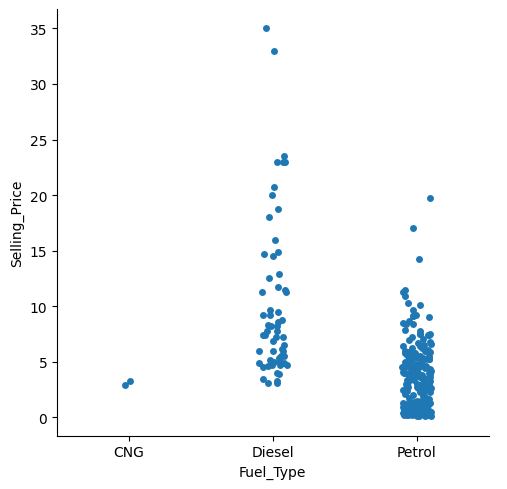

In [86]:
sns.catplot(df , x ='Fuel_Type', y = 'Selling_Price')

По данному графику можно сделать вывод, что машины на дизельном топливе машины стоят в основном дороже

<ipython-input-87-280803466509>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 640x480 with 0 Axes>

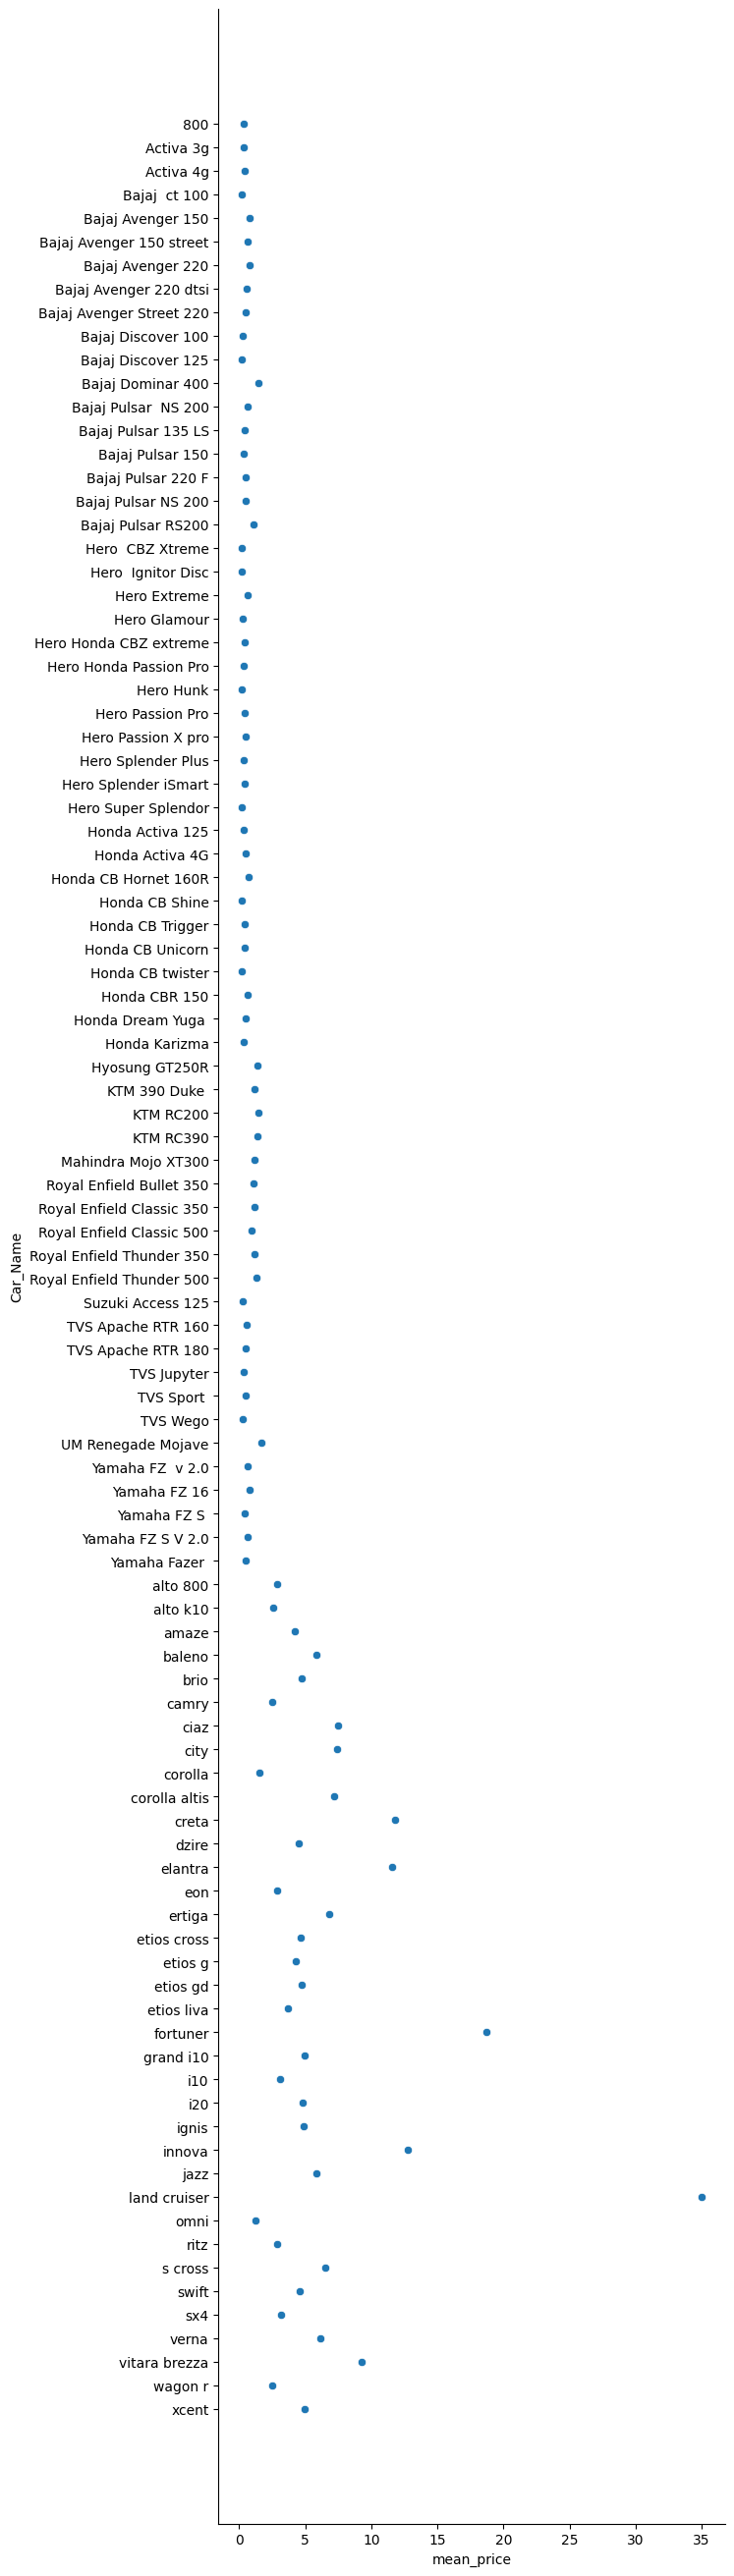

In [87]:
df_car_price = df.groupby(['Car_Name'], as_index=False).agg({'Selling_Price':'mean'}).rename(columns={'Selling_Price':'mean_price'})
df_car_price = df_car_price
plt.figure()
sns.relplot(data=df_car_price, x='mean_price', y = 'Car_Name')
plt.gcf().set_size_inches(10, 30)

plt.show()

С поомщью данного графика посмотрели, зависимость стоимости машины от ее модели.\
Для этого предварительно сгруппировали машины по моделям и посчитали среднюю цену.

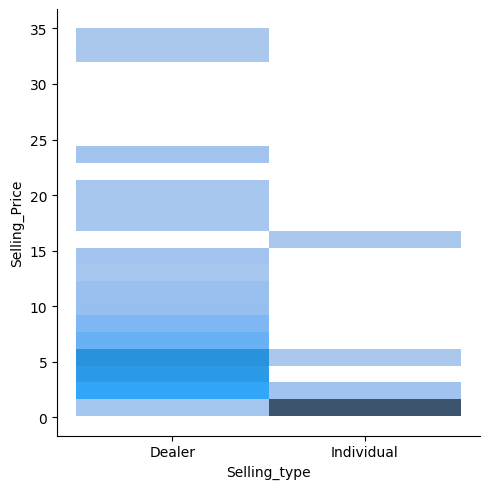

In [88]:
sns.displot(df,x='Selling_type', y = 'Selling_Price')

По даррному графику видно, что стоимость машины зависит от того, покупаешь ли ты ее с рук или с салона.\


In [89]:
import plotly.figure_factory as ff
corrs = df[['Selling_Price','Year','Driven_kms','Present_Price']].corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

По построенной матрице мы можем наблюдать корреляцию между числовыми переменными.

# Сохраняем итоговый датасет

In [90]:

df.to_pickle('/home/mainuser/IIS_Li_Egor/data/clean_data.pkl')

In [91]:
# Считать можно так:
df = pd.read_pickle('/home/mainuser/IIS_Li_Egor/data/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int32   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Driven_kms     301 non-null    int32   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    category
 9   Driven_run     301 non-null    object  
dtypes: category(5), float64(2), int32(2), object(1)
memory usage: 11.8+ KB


# Выводы после EDA

Выводы, полученные в ходе анализа:
 * Очистка данных не производилась
 * Был создан новый признак - уровень пробега автомобиля


Закономерности, выявлены по графикам, которые могут быть полезны в дальнейшем для решния задачи:
 * В основном машины меньшего года выпуска стоят дешевле.
 * Дизельные автомобили стоят в основном дороже, что соответсвует правде.
 * Были продемонстрированы более дорогие модели машин.
 * Был сделан вывод, что машины с салона стоят дороже, чем с рук.
 * Стоимосить машины больше всего коррелирует с годом выпуска.